# Examining Results From Scraping the Star Trek Wiki

We web-scraped the Star Trek Wiki pages listing canon planets and named Starfleet officers, exported the data to CSV files, and processed and visualized the data below.

In [8]:
import pandas as pd
import matplotlib.pyplot as plt


## How many of the Star Trek planets are habitable?

In [9]:
df = pd.read_csv('scraped_planets.csv')
df.head()

,planet_name,status
0,Aaamazzara,Habitable
1,Acamar_III,Habitable
2,Achrady_VII,Habitable
3,Adarak_Prime,Habitable
4,Adelphous_IV,Intact


In [23]:
# Clean statuses
df['status'] = df['status'].replace("Habitability", "Habitable")
df['status'] = df['status'].replace("Habitable;", "Habitable")
df['status'] = df['status'].replace("Inhabited", "Habitable")
df['status'] = df['status'].replace("Destroyed;", "Destroyed")
df['status'] = df['status'].replace("Devastated", "Destroyed")
df['status'] = df['status'].replace("Devasted", "Destroyed")
df['status'] = df['status'].replace("Barely", "Habitable")
df['status'] = df['status'].replace("Depopulated", "Abandoned")
df['status'] = df['status'].replace("Geologically", "Uninhabitable")
df['status'] = df['status'].replace("Active", "Uninhabitable")
df['status'] = df['status'].replace("Extinguished", "Uninhabitable")
df['status'] = df['status'].replace("In", "In another dimension")
df['status'] = df['status'].replace("Undergoing", "Undergoing terraformation")

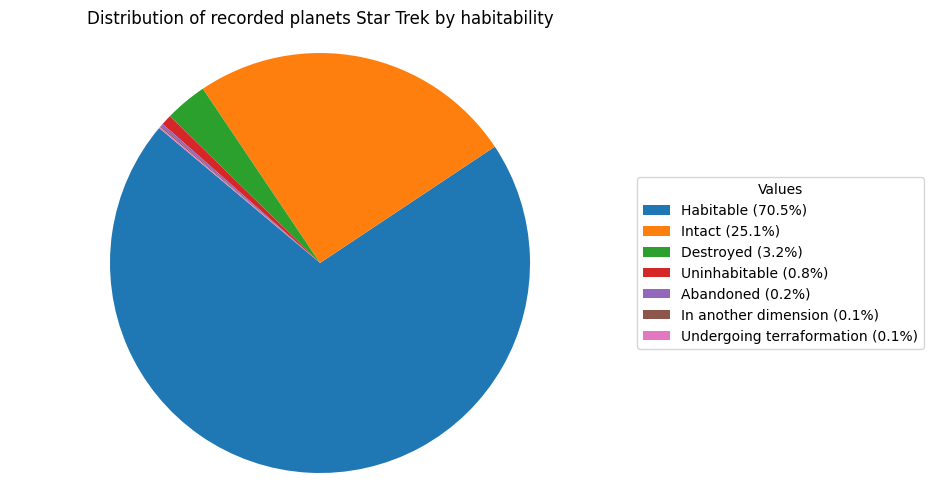

In [32]:
value_counts = df['status'].value_counts()

plt.figure(figsize=(8, 6))
patches, _= plt.pie(value_counts, labels=None, startangle=140)
plt.title('Distribution of recorded planets Star Trek by habitability')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Create legend labels with percentages
legend_labels = [f'{val} ({count / value_counts.sum() * 100:.1f}%)' for val, count in value_counts.items()]

# Add legend with labels and percentages
plt.legend(patches, legend_labels, title='Values', loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

## What is the breakdown of Star Fleet officers by rank?

In [91]:
df = pd.read_csv('scraped_ranks.csv')
df.head()

,officer_name,rank
0,Alex,Crewman
1,Alison,Crewman
2,Almack,Ensign
3,Masaro,Ensign
4,Jonathan Archer,Admiral


In [93]:
# Clean and merge ranks
df['rank'] = df['rank'].str.title()

df = df[df['rank'] != 'Colonel']
df = df[df['rank'] != 'Officer']

df['rank'] = df['rank'].replace("Enlisted", "Crewman")
df['rank'] = df['rank'].replace("Able Seaman", "Crewman")
df['rank'] = df['rank'].replace("Crewmen", "Crewman")
df['rank'] = df['rank'].replace("Provisional", "Crewman")
df['rank'] = df['rank'].replace("Doctor", "Lieutenant Commander")
df['rank'] = df['rank'].replace("General", "Commodore")
df['rank'] = df['rank'].replace("Midshipman First Class", "Cadet")
df['rank'] = df['rank'].replace("Technician", "Crewman")

df['rank'] = df['rank'].replace("Crewman first class", "Crewman")
df['rank'] = df['rank'].replace("Crewman second class", "Crewman")
df['rank'] = df['rank'].replace("Crewman third class", "Crewman")

df['rank'] = df['rank'].replace("Petty Officer, 2Nd Class", "Petty Officer")
df['rank'] = df['rank'].replace("Petty Officer, 1St Class", "Petty Officer")
df['rank'] = df['rank'].replace("Petty Officer, 3Rd Class", "Petty Officer")
df['rank'] = df['rank'].replace("Chief", "Chief Petty Officer")
df['rank'] = df['rank'].replace("Senior Chief Petty Officer", "Chief Petty Officer")
df['rank'] = df['rank'].replace("Master Chief Petty Officer", "Chief Petty Officer")

df['rank'] = df['rank'].replace("Cadet Second Class", "Cadet")


In [95]:
value_counts = df['rank'].value_counts()
order = ['Cadet', 'Crewman', 'Petty Officer', 'Chief Petty Officer', 'Ensign', 'Lieutenant Junior Grade', 'Lieutenant', "Lieutenant Commander", "Commander", "Captain", "Commodore", "Rear Admiral", "Vice Admiral", "Admiral", "Fleet Admiral"]

# Reorder the categories
value_counts = value_counts.reindex(order)

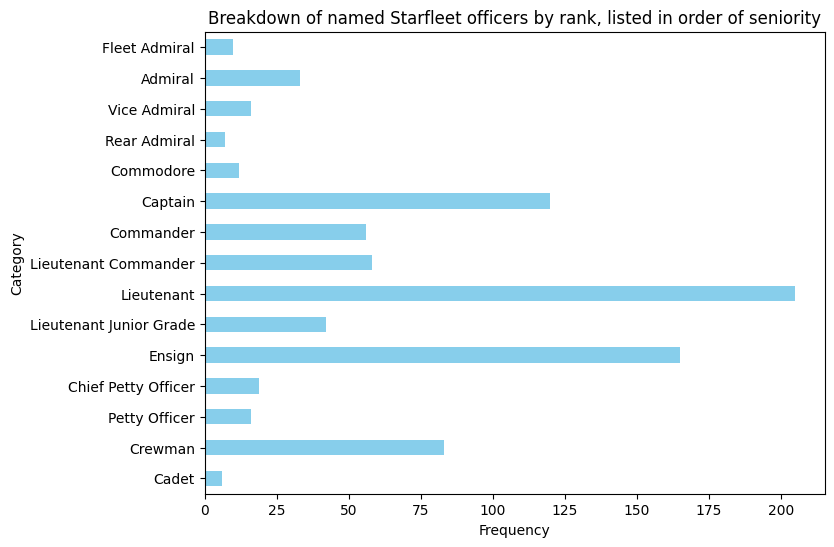

In [97]:
# Plot horizontal histogram

value_counts.plot(kind='barh', color='skyblue', figsize=(8, 6))
plt.title('Breakdown of named Starfleet officers by rank, listed in order of seniority')
plt.xlabel('Frequency')
plt.ylabel('Category')
plt.show()